# Tratamiento de Valores Faltantes sobre datos de NHANES

## Preparacion del entorno

### Librerias

In [2]:
import janitor  # limpiar datos
import matplotlib.pyplot as plt # visualizacion de datos
import missingno    # exploracion de valores faltantes
import nhanes.load  # libreria con los datos a analizar
import numpy as np  # calculos numericos
import pandas as pd # trabajar con dataframe
import scipy.stats  # trabjar con estadisticos
import seaborn as sns   #   visualizacion estadistica
# import session_info
# sklearn contiene los modelos a utilizar
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic

### Importar funciones personalizadas

In [3]:
%run '../utils2.ipynb'

### Configuracion de las Graficas 

In [4]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 6)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

## Datos preparados: NHANES

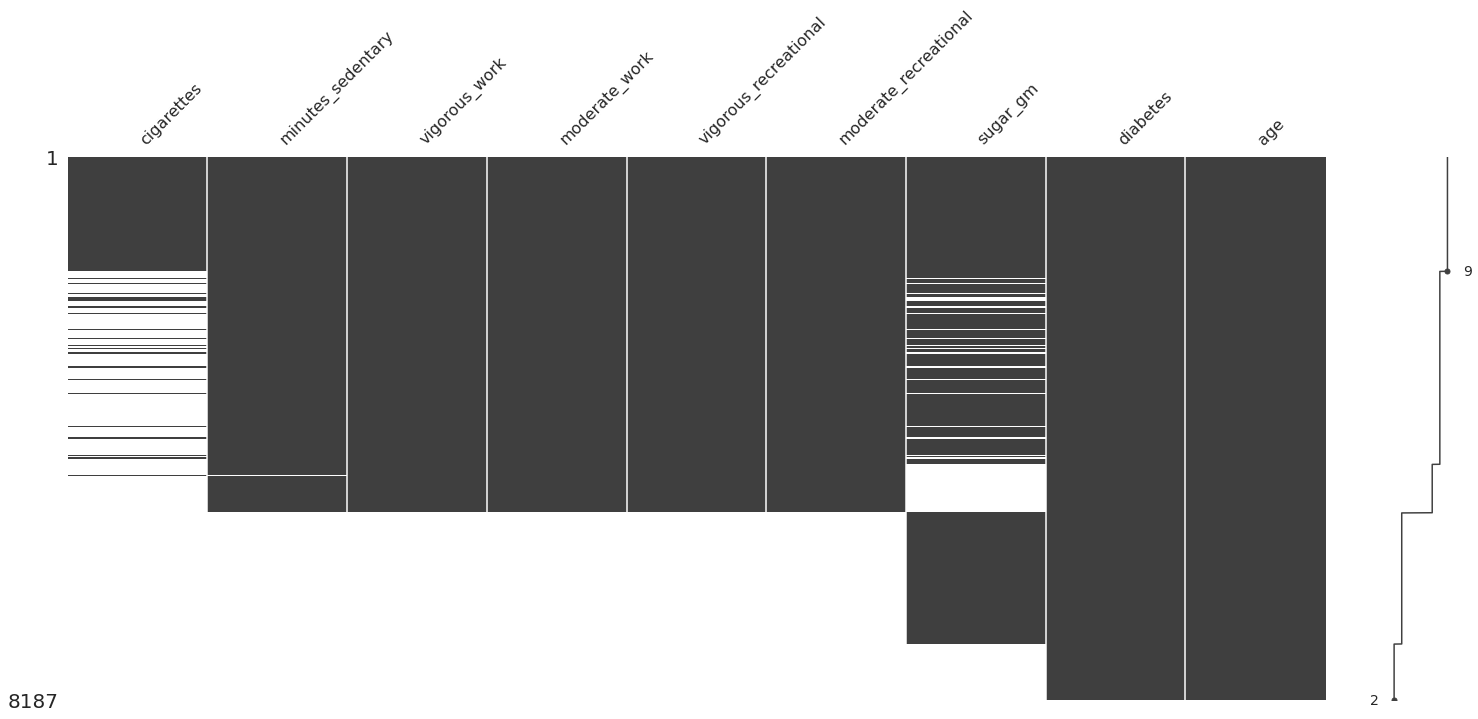

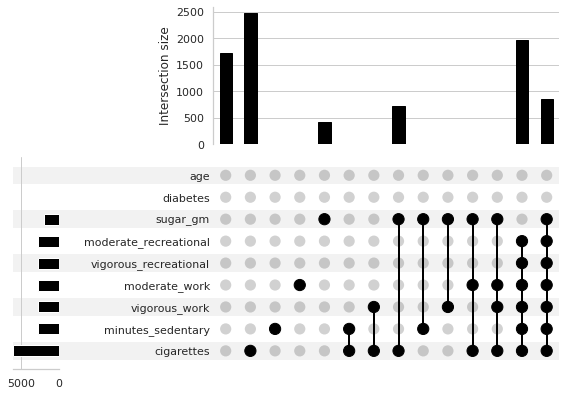

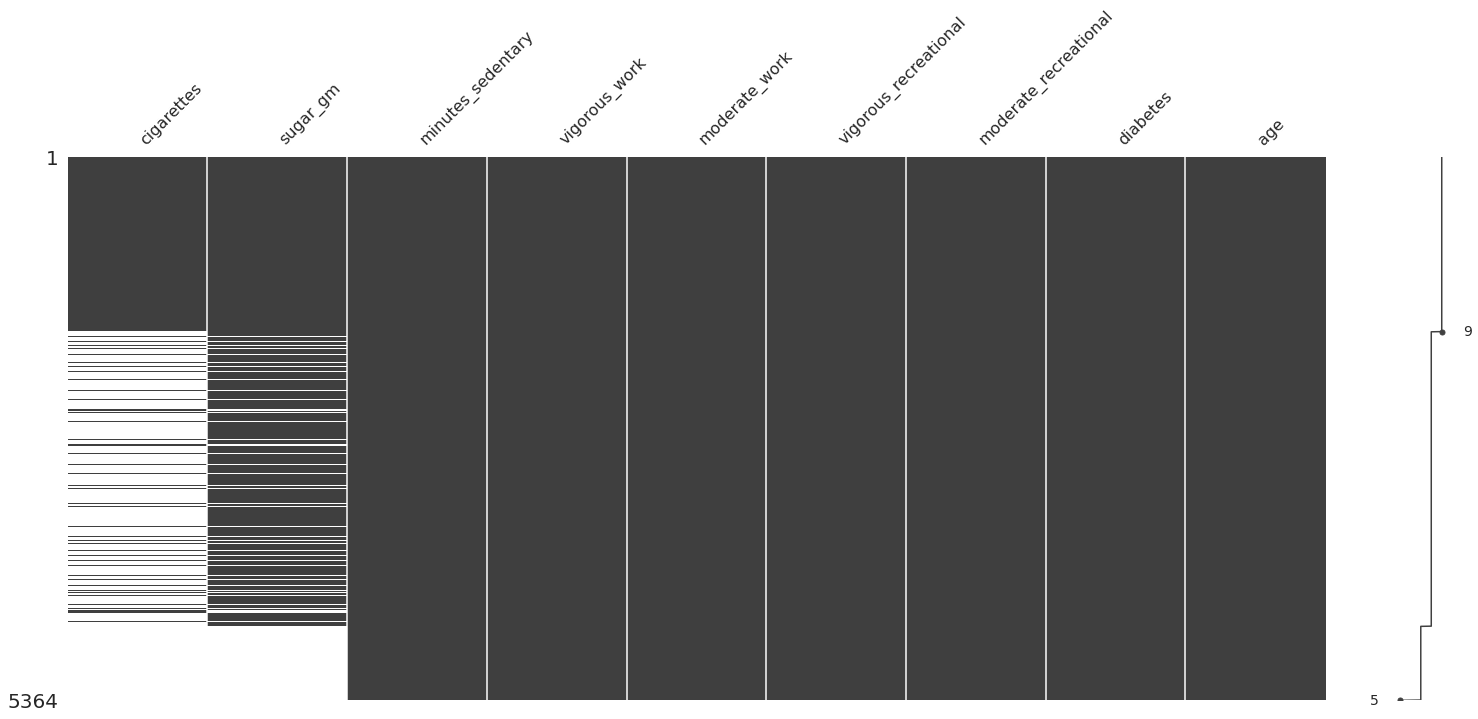

9.96 %


In [5]:
%run descarga_carga_datos.ipynb

## Prueba de Hipotesis t test para establecer el tipo de valores faltantes

In [13]:
# creamos dos grupos con las variable vigorous_work para comparar sus valores
# en la variable cigarettes que contiene valores faltantes

work_cigarettes, noWork_cigarettes = (
    nhanes_df
    .select_columns('vigorous_work', 'cigarettes')
    .transform_column(
        'cigarettes',
        lambda x: x.isna(),
        elementwise = False
    )
    .groupby('vigorous_work')
    .cigarettes
    .pipe(
        lambda df:(
            df.get_group(0),
            df.get_group(1)
        )
    )
)

# work_cigarettes indica las personas que trabajan energicamente con su condicion de fumador
# noWork_cigarettes indica las personas que no trabajan de forma vigorosa con su condicion de fumador
work_cigarettes

SEQN
93705.0     False
93706.0      True
93709.0     False
93711.0      True
93713.0     False
            ...  
102944.0     True
102947.0    False
102948.0    False
102954.0     True
102956.0    False
Name: cigarettes, Length: 4065, dtype: bool